<a href="https://colab.research.google.com/github/AlaaIraqy/SignatureRecognition/blob/main/SignatureRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=b6678ddb74689c59d5e3c207f153f4d18390e35a8a8b9205a02f0d7fedba3630
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7878 sha256=1793e8d81bc9047129166ef64b49c75da50340342afd46229348401ae4723be2
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=99708d03c4dd0e03ff53059595cf0016ec216511f3f1052ee8a70b14420f2844
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [8]:
# General
import gc, os
import numpy as np
from tqdm.notebook import tqdm, trange
import cv2

# Machine Learning
import tensorflow as tf
from keras import Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_keras_history import plot_history

# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
!unzip '/content/drive/MyDrive/signatureData/UTSig.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: UTSig/Forgery/Simple/75/52.tif  
  inflating: UTSig/Forgery/Simple/75/53.tif  
  inflating: UTSig/Forgery/Simple/75/54.tif  
  inflating: UTSig/Forgery/Simple/75/55.tif  
  inflating: UTSig/Forgery/Simple/75/56.tif  
  inflating: UTSig/Forgery/Simple/75/61.tif  
  inflating: UTSig/Forgery/Simple/75/62.tif  
  inflating: UTSig/Forgery/Simple/75/63.tif  
  inflating: UTSig/Forgery/Simple/75/64.tif  
  inflating: UTSig/Forgery/Simple/75/65.tif  
  inflating: UTSig/Forgery/Simple/75/66.tif  
   creating: UTSig/Forgery/Simple/76/
  inflating: UTSig/Forgery/Simple/76/11.tif  
  inflating: UTSig/Forgery/Simple/76/12.tif  
  inflating: UTSig/Forgery/Simple/76/13.tif  
  inflating: UTSig/Forgery/Simple/76/14.tif  
  inflating: UTSig/Forgery/Simple/76/15.tif  
  inflating: UTSig/Forgery/Simple/76/16.tif  
  inflating: UTSig/Forgery/Simple/76/21.tif  
  inflating: UTSig/Forgery/Simple/76/22.tif  
  inflating: UTSig/Forgery/Simple/76/

Loading Data

In [30]:
# 18 4 6
whole_data = []
for i in range(1,116):
  path = "/content/UTSig/Genuine/"+str(i)
  paths = os.listdir(path)
  paths.sort()
  for image in (paths):
    img = cv2.imread(path + '/' + image)
    whole_data.append(img)

(3105,)


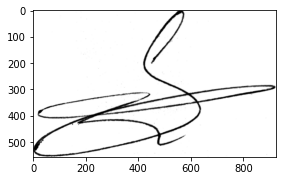

In [39]:
whole_data = np.array(whole_data)
plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(whole_data[3103], cv2.COLOR_BGR2RGB))
print(whole_data.shape)

Splitting data

In [71]:
training_data=[]
training_labels=[]
validation_data=[]
validation_labels=[]
test_data=[]
test_labels=[]

for ii in range(115):
  for i in range(18):
    training_data.append(whole_data[i])
  for j in range(18,22):
    validation_data.append(whole_data[j])
  for k in range(22,27):
    test_data.append(whole_data[k])
    i+=27
    j+=27
    k+=27

(115,)
(92,)
(414,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

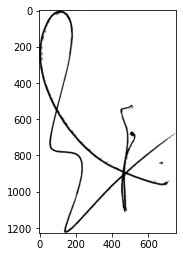

In [72]:
training_data=np.array(training_data)
validation_data=np.array(validation_data)
test_data=np.array(test_data)
print(test_data.shape)
print(validation_data.shape)
print(training_data.shape)

plt.figure(figsize=(20,9))
plt.subplot(2,4,1)
plt.imshow(cv2.cvtColor(validation_data[50], cv2.COLOR_BGR2RGB))